In [1]:
"""
Universidad Autónoma de Chihuahua
Facultad de Ingeniería
Maestría en Ingeniería en Computación
Machine Learning
Proyecto Final Rain in Australia
Gael Aristides Hinojos Ramírez
384104
"""

'\nUniversidad Autónoma de Chihuahua\nFacultad de Ingeniería\nMaestría en Ingeniería en Computación\nMachine Learning\nProyecto Final Rain in Australia\nGael Aristides Hinojos Ramírez\n384104\n'

In [34]:
import pandas as pd
import math as mt
import matplotlib.pyplot as pt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import hashlib
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [3]:
#Se lee el dataset y se describen las columnas con valores numericos
rain = pd.read_csv('weatherAUS.csv')
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
#Se visualiza una lista de columnas
rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

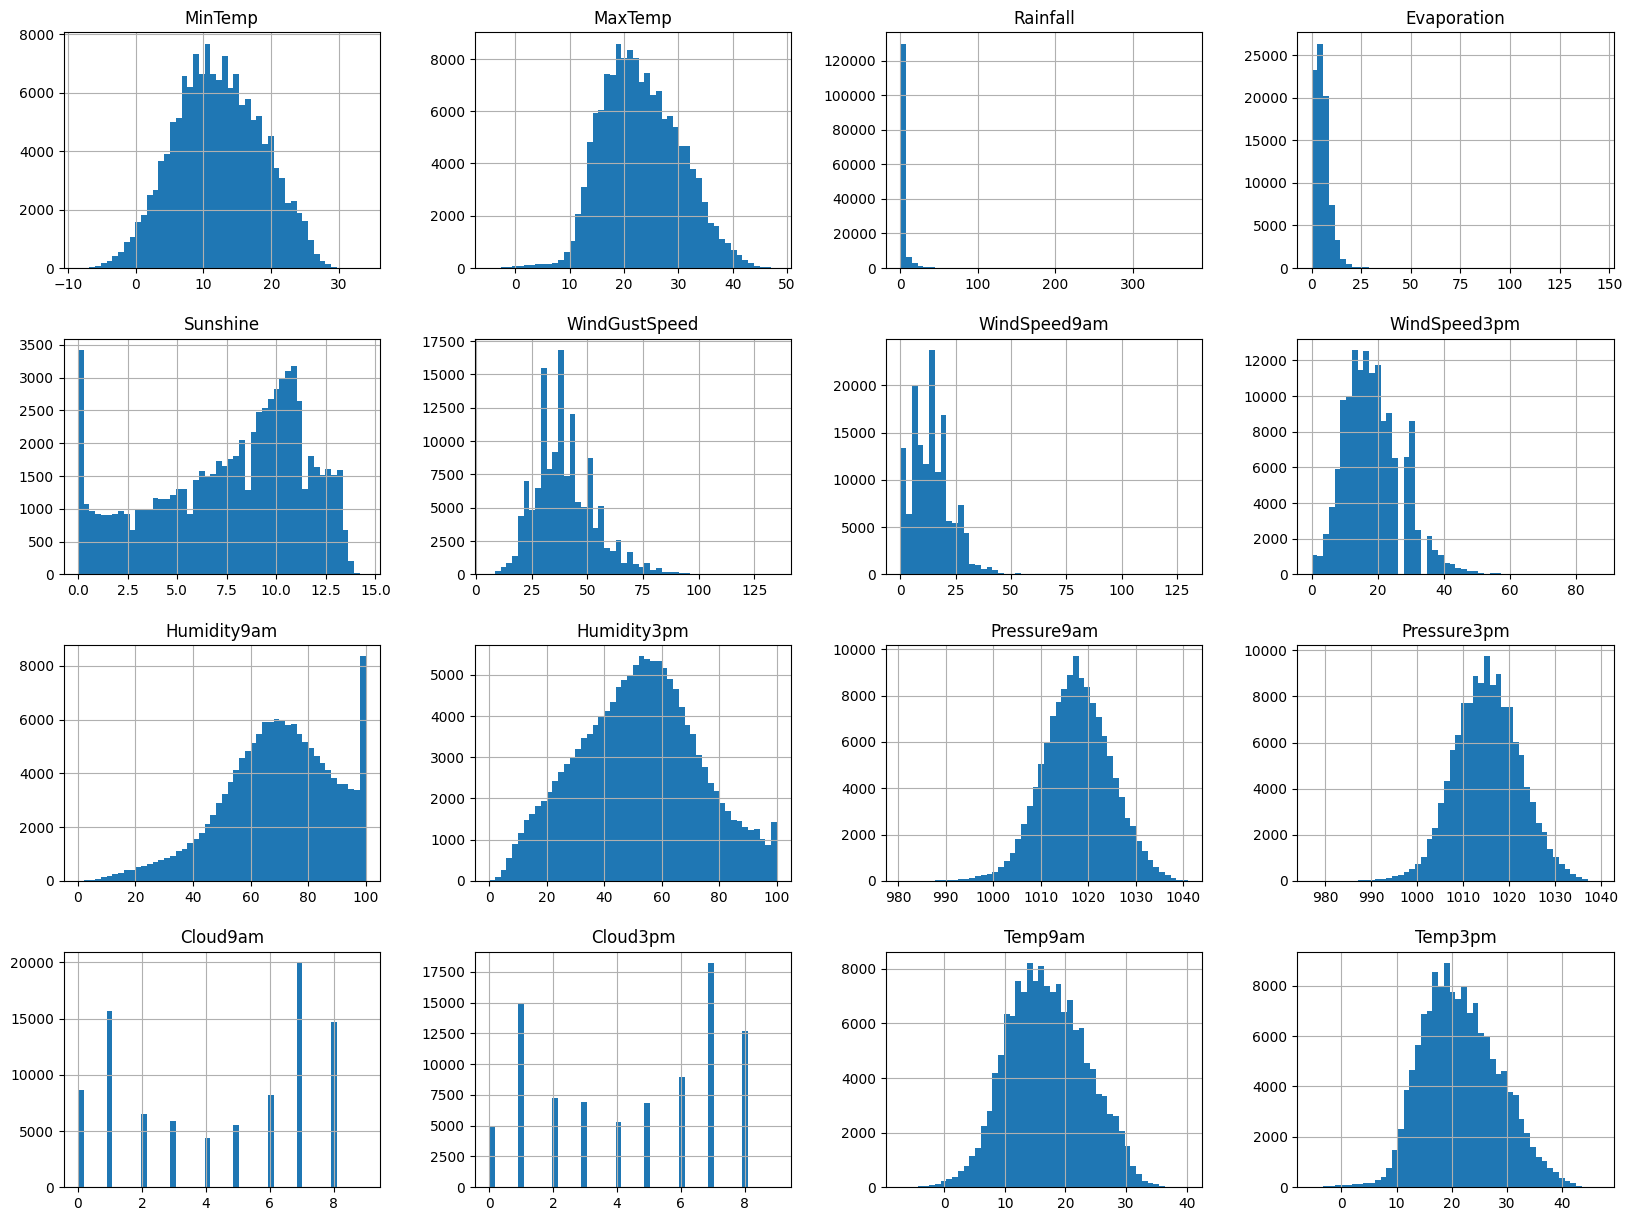

In [5]:
#Se realiza un histograma
rain.hist(bins=50, figsize=(20,15))

In [6]:
#Se separa la fecha en distintas columnas de día, mes y año
rain['Date'] = pd.to_datetime(rain['Date'])
rain['Day'] = rain['Date'].dt.day
rain['Month'] = rain['Date'].dt.month
rain['Year'] = rain['Date'].dt.year
rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [7]:
#Se eliminan las columnas que tienen muchos valores nulos; se elimina la columna de date; se eliminan los rows en donde la
#columna RainTomorrow o RainToday tiene valores vacios; se observan cuantos rows quedan despues de esto
"""rain = rain.drop('Evaporation', axis=1)
rain = rain.drop('Sunshine', axis=1)
rain = rain.drop('Cloud9am', axis=1)
rain = rain.drop('Cloud3pm', axis=1)"""
rain = rain.drop('Date', axis=1)
rain.dropna(subset='RainTomorrow', inplace=True)
rain.dropna(subset='RainToday', inplace=True)
len(rain)

140787

In [8]:
#Se cambian los valores de las columnas de RainTomorrow y RainToday por valores binarios 1 y 0
rain.loc[rain['RainTomorrow'] == 'No', 'RainTomorrow'] = 0.
rain.loc[rain['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1.
rain.loc[rain['RainToday'] == 'No', 'RainToday'] = 0.
rain.loc[rain['RainToday'] == 'Yes', 'RainToday'] = 1.

In [9]:
#Se crea una matriz de correlacion con todos los valores numericos
corr_dataframe = rain[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']].copy()
corr_matrix = corr_dataframe.corr()
corr_matrix['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.447834
RainToday        0.313097
Humidity9am      0.257727
Rainfall         0.239032
WindGustSpeed    0.234285
WindSpeed9am     0.089803
WindSpeed3pm     0.086762
MinTemp          0.084322
Month            0.007192
Day              0.005183
Year            -0.013074
Temp9am         -0.025447
MaxTemp         -0.159405
Temp3pm         -0.192747
Pressure3pm     -0.228192
Pressure9am     -0.248253
Name: RainTomorrow, dtype: float64

array([[<Axes: xlabel='Rainfall', ylabel='Rainfall'>,
        <Axes: xlabel='Humidity3pm', ylabel='Rainfall'>,
        <Axes: xlabel='Humidity9am', ylabel='Rainfall'>],
       [<Axes: xlabel='Rainfall', ylabel='Humidity3pm'>,
        <Axes: xlabel='Humidity3pm', ylabel='Humidity3pm'>,
        <Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>],
       [<Axes: xlabel='Rainfall', ylabel='Humidity9am'>,
        <Axes: xlabel='Humidity3pm', ylabel='Humidity9am'>,
        <Axes: xlabel='Humidity9am', ylabel='Humidity9am'>]], dtype=object)

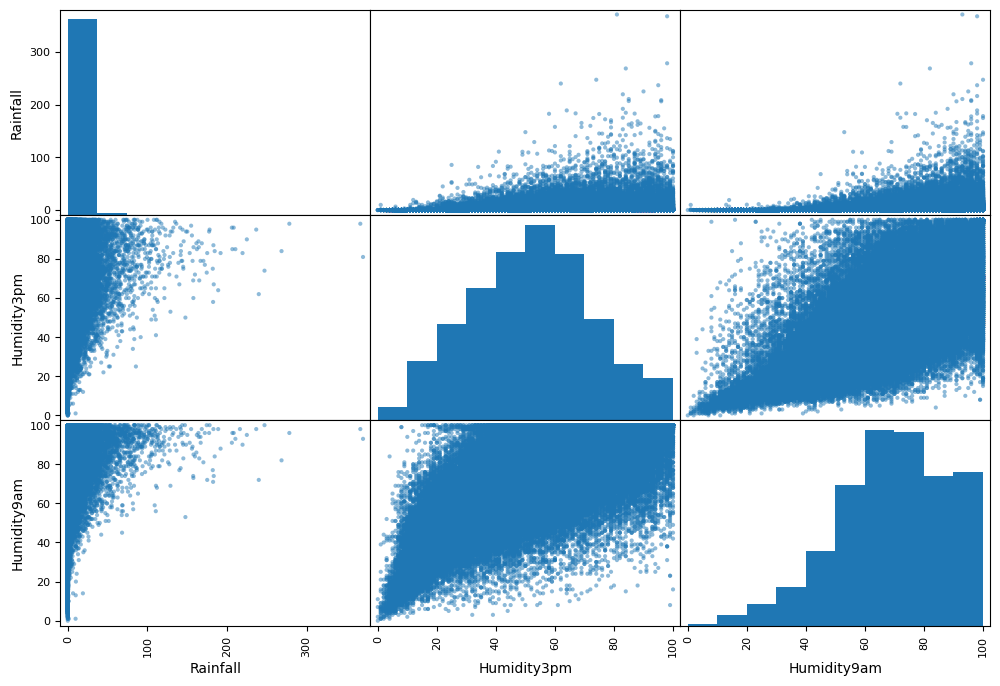

In [10]:
#Se crea un scatter matrix con los valores con mas correlacion
from pandas.plotting import scatter_matrix
attributes = ['RainToday', 'Rainfall', 'Humidity3pm', 'Humidity9am', 'RainTomorrow']
scatter_matrix(rain[attributes], figsize=(12,8))

In [11]:
rain.loc[rain['RainTomorrow'] == 0., 'RainTomorrow'] = 'No'
rain.loc[rain['RainTomorrow'] == 1., 'RainTomorrow'] = 'Yes'

In [12]:
#Se realiza la particion del dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rain, rain['RainTomorrow'], random_state=12, test_size=0.25)
print(X_train.shape)

(105590, 25)


In [13]:
#Se crea un Imputador que calcula la media por Localidad
class MeanByLocation(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        self.dict_mean = {}
        new_X = []
        super().__init__()
    def mean_filler(self, row):
        #print(row['Location'])
        values_fill = self.dict_mean[row['Location']]
        row['MinTemp'] = (values_fill['MinTemp'] if pd.isna(row['MinTemp']) else row['MinTemp'])
        row['MaxTemp']  = (values_fill['MaxTemp'] if pd.isna(row['MaxTemp']) else row['MaxTemp'])
        row['Rainfall']  = (values_fill['Rainfall'] if pd.isna(row['Rainfall']) else row['Rainfall'])
        row['WindGustSpeed'] = (values_fill['WindGustSpeed'] if pd.isna(row['WindGustSpeed']) else row['WindGustSpeed'])
        row['WindSpeed9am'] = (values_fill['WindSpeed9am'] if pd.isna(row['WindSpeed9am']) else row['WindSpeed9am'])
        row['WindSpeed3pm'] = (values_fill['WindSpeed3pm'] if pd.isna(row['WindSpeed3pm']) else row['WindSpeed3pm'])
        row['Humidity9am'] = (values_fill['Humidity9am'] if pd.isna(row['Humidity9am']) else row['Humidity9am'])
        row['Humidity3pm'] = (values_fill['Humidity3pm'] if pd.isna(row['Humidity3pm']) else row['Humidity3pm'])
        row['Pressure9am'] = (values_fill['Pressure9am'] if pd.isna(row['Pressure9am']) else row['Pressure9am'])
        row['Pressure3pm'] = (values_fill['Pressure3pm'] if pd.isna(row['Pressure3pm']) else row['Pressure3pm'])
        row['Temp9am'] = (values_fill['Temp9am'] if pd.isna(row['Temp9am']) else row['Temp9am'])
        row['Temp3pm'] = (values_fill['Temp3pm'] if pd.isna(row['Temp3pm']) else row['Temp3pm'])
        return row
    def fit(self, X, y=None):
        self.new_X = X.copy()
        self.dict_mean =  self.new_X.groupby('Location').mean().to_dict('index')
        print(self.dict_mean)
        return self
    def transform(self, X):
        real_X = X.copy()
        real_X = real_X.apply(self.mean_filler, axis=1)
        return real_X

In [14]:
#Se crea un Imputador que convierte las columnas de tipo String a valores hash
class StringHasher(BaseEstimator, TransformerMixin):
    def hashString(self, s):
        s = str(s)
        return int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**4
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        new_X = X.copy()
        new_X['Location'] = new_X['Location'].apply(self.hashString)
        new_X['WindDir3pm'] = new_X['WindDir3pm'].apply(self.hashString)
        new_X['WindDir9am'] = new_X['WindDir9am'].apply(self.hashString)
        new_X['WindGustDir'] = new_X['WindGustDir'].apply(self.hashString)
        return new_X

In [15]:
#Se crea el pipeline, el cual utiliza los imputadores anteriores más el imputador simple en los casos donde no existe ningún
#valor en la localidad. Además, se utiliza el método de MinMax Scaler
pipeline = Pipeline([
    ('hash_str', StringHasher()),
    ('mean_by_location', MeanByLocation()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('minmax_scaler', MinMaxScaler(feature_range=(0, 1)))
])
real_rain = X_train.drop('RainTomorrow', axis=1)
scaled_rain = pipeline.fit_transform(real_rain)
print(scaled_rain.shape)
#print(scaled_rain.info(verbose=True))
print(scaled_rain)

{88: {'MinTemp': 10.027088830255057, 'MaxTemp': 20.475681618293756, 'Rainfall': 1.499296394019349, 'Evaporation': 4.6676056338028165, 'Sunshine': 6.363528376594808, 'WindGustDir': 6419.423922603342, 'WindGustSpeed': 47.290450928381965, 'WindDir9am': 6142.731750219877, 'WindDir3pm': 6144.6187335092345, 'WindSpeed9am': 20.560492740871094, 'WindSpeed3pm': 23.18249780123131, 'Humidity9am': 70.03393565447334, 'Humidity3pm': 51.22829440282062, 'Pressure9am': 1018.0031222515391, 'Pressure3pm': 1016.2239226033422, 'Cloud9am': 5.255057167985928, 'Cloud3pm': 5.24769027716674, 'Temp9am': 14.151890941072999, 'Temp3pm': 18.925769569041336, 'RainToday': 0.22207563764291996, 'Day': 15.704485488126648, 'Month': 6.319700967458223, 'Year': 2012.778364116095}, 222: {'MinTemp': 9.597562056737589, 'MaxTemp': 22.717819148936172, 'Rainfall': 1.9364643331856448, 'Evaporation': nan, 'Sunshine': nan, 'WindGustDir': 6201.316792202038, 'WindGustSpeed': 33.047513321492005, 'WindDir9am': 6455.995126273815, 'WindDir

In [16]:
pca = PCA(n_components=0.95)
scaled_rain_1 = pca.fit_transform(scaled_rain)

In [17]:
print(scaled_rain_1.shape)

(105590, 13)


In [18]:
#Se aplica a los datos la técnica de oversampling SMOTE
smote = SMOTE(random_state=12)
smote_rain, smote_y = smote.fit_resample(scaled_rain, y_train)

In [19]:
smote_rain_1, smote_y_1 = smote.fit_resample(scaled_rain_1, y_train)

In [ ]:
#Se crea un grid de parámetros para el modelo de Regresión Logística
log_reg = LogisticRegression()
param_grid = [
    {'solver': ['lbfgs', 'newton-cg', 'sag', 'newton-cholesky'], 'penalty': ['l2', None], 'fit_intercept': [True, False], 
     'max_iter': [50, 100, 150], 'warm_start': [True, False], 'random_state': [12], 'C': [1.0, 10.0, 100.0]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', None], 'fit_intercept': [True, False], 'C': [1.0, 10.0, 100.0],
     'max_iter': [50, 100, 150], 'warm_start': [True, False], 'random_state': [12]}, 
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'fit_intercept': [True, False], 'random_state': [12], 'C': [1.0, 10.0, 100.0],
     'max_iter': [50, 100, 150], 'warm_start': [True, False], 'l1_ratio': [0.25, 0.5, 0.75]}
]

In [21]:
#Se utiliza la técnica de Randomized Search para buscar los mejores hiperparámetros para el modelo de Regresión Logística
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_grid, cv=10)
random_search.fit(smote_rain_1, smote_y_1)

print('Best Parameters: ', random_search.best_params_)
print('Best Estimator: ', random_search.best_estimator_)
print('Best Score: ', random_search.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio par

Best Parameters:  {'warm_start': True, 'solver': 'newton-cholesky', 'random_state': 12, 'penalty': 'l2', 'n_jobs': 4, 'max_iter': 150, 'fit_intercept': True, 'C': 1.0}
Best Estimator:  LogisticRegression(max_iter=150, n_jobs=4, random_state=12,
                   solver='newton-cholesky', warm_start=True)
Best Score:  0.7737717314257205


In [22]:
#Se transforman los datos del set de test por medio del pipeline
test_rain = X_test.drop('RainTomorrow', axis=1)
scaled_rain_test = pipeline.transform(test_rain)
scaled_rain_test_1 = pca.transform(scaled_rain_test)

In [23]:
#Se utiliza el mejor modelo calculado por Randomized Search y se predicen resultados
final_log_reg = random_search.best_estimator_
test_pred = final_log_reg.predict(scaled_rain_test_1)

              precision    recall  f1-score   support

         Yes       0.92      0.77      0.84     27377
          No       0.49      0.76      0.60      7820

    accuracy                           0.77     35197
   macro avg       0.70      0.77      0.72     35197
weighted avg       0.82      0.77      0.78     35197

Accuracy:  0.7690712276614484
Area Under the Curve:   0.8505816763133165


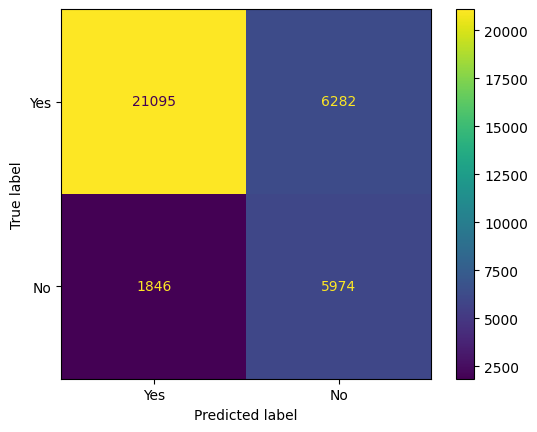

In [24]:
#Se realiza un reporte de clasificación, además de calcular el Accuracy y Area Under the Curve. Se crea la matriz de confusión.
print(classification_report(y_test, test_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, test_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, final_log_reg.decision_function(scaled_rain_test_1)))
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_pred, display_labels=['Yes', 'No'])
disp

In [25]:
adaboost_grid = {
    'learning_rate': [0.5, 1.0, 1.5, 2.0], 'random_state': [12]
}

In [27]:
#Se realiza un Grid Search para encontrar los parámetros óptimos para el algoritmo Adaboost
adaboost_gs = GridSearchCV(AdaBoostClassifier(), adaboost_grid, cv=5)
adaboost_gs.fit(smote_rain_1, smote_y_1)

print('Best Parameters: ', adaboost_gs.best_params_)
print('Best Estimator: ', adaboost_gs.best_estimator_)
print('Best Score: ', adaboost_gs.best_score_)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

Best Parameters:  {'learning_rate': 1.0, 'random_state': 12}
Best Estimator:  AdaBoostClassifier(random_state=12)
Best Score:  0.772774331442826


              precision    recall  f1-score   support

         Yes       0.91      0.77      0.84     27377
          No       0.48      0.75      0.58      7820

    accuracy                           0.76     35197
   macro avg       0.70      0.76      0.71     35197
weighted avg       0.82      0.76      0.78     35197

Accuracy:  0.7642412705628321
Area Under the Curve:   0.8407405146310301


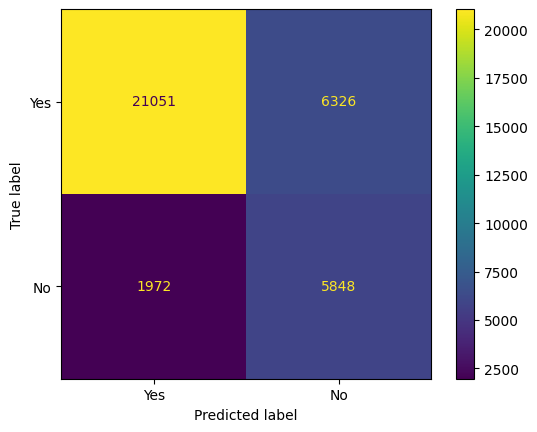

In [28]:
#Se realiza predicciones con el modelo de Adaboost y se obtienen métricas
adaboost_model = adaboost_gs.best_estimator_
adaboost_pred = adaboost_model.predict(scaled_rain_test_1)

print(classification_report(y_test, adaboost_pred, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, adaboost_pred))
print('Area Under the Curve:  ', roc_auc_score(y_test, adaboost_model.predict_proba(scaled_rain_test_1)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred, display_labels=['Yes', 'No'])
disp

In [30]:
#Para poder utilizar el modelo XGboost, se reemplazan las etiquetas de tipo string a valores binarios.
smote_y_num = smote_y_1.where(smote_y_1 != 'No', 0)
smote_y_num = smote_y_num.where(smote_y_num != 'Yes', 1)

In [48]:
xgb_grid = {
    'eta': [0.3, 0.4, 0.5, 0.6, 0.7], 'max_depth': [2, 3, 4, 5, 6], 'subsample': [0.25, 0.5, 0.75, 1], 'grow_policy': ['depthwise', 'lossguide'], 'eval_metric': ['logloss']
}

In [49]:
#Se implementa el modelo XGboost y se entrena usando las etiquetas de tipo binario.
xgb_rs = GridSearchCV(xgb.XGBClassifier(), xgb_grid, cv=5, scoring='neg_mean_squared_error')
xgb_rs.fit(smote_rain_1, smote_y_num)

print('Best Parameters: ', xgb_rs.best_params_)
print('Best Estimator: ', xgb_rs.best_estimator_)
print('Best Score: ', xgb_rs.best_score_)

Best Parameters:  {'eta': 0.7, 'eval_metric': 'logloss', 'grow_policy': 'depthwise', 'max_depth': 6, 'subsample': 1}
Best Estimator:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.7, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Best Score:  -0.21985424705580442


In [50]:
#Se realizan las predicciones
xgb_ensemble = xgb_rs.best_estimator_
pred_xgb = xgb_ensemble.predict(scaled_rain_test_1)

In [51]:
#Se convierten las predicciones a la clase de Series de Panda. Se reemplazan los valores binarios por los valores en string originales para
#obtener métricas.
pred_xgb = pd.Series(pred_xgb)
pred_xgb = pred_xgb.where(pred_xgb != 0, 'No')
pred_xgb = pred_xgb.where(pred_xgb != 1, 'Yes')

              precision    recall  f1-score   support

         Yes       0.91      0.80      0.85     27377
          No       0.50      0.71      0.59      7820

    accuracy                           0.78     35197
   macro avg       0.70      0.75      0.72     35197
weighted avg       0.82      0.78      0.79     35197

Accuracy:  0.7783617921981987
Area Under the Curve:   0.8375791671598436


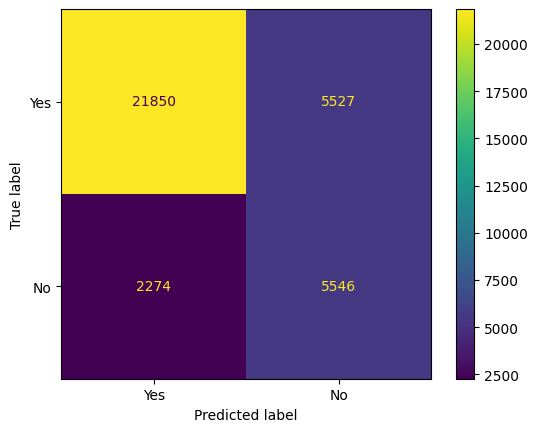

In [52]:
#Se calculan las métricas del model XGboost
print(classification_report(y_test, pred_xgb, target_names=['Yes', 'No']))
print('Accuracy: ', accuracy_score(y_test, pred_xgb))
print('Area Under the Curve:  ', roc_auc_score(y_test, xgb_ensemble.predict_proba(scaled_rain_test_1)[:, 1]))
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb, display_labels=['Yes', 'No'])
disp

In [53]:
#Se guarda el pipeline y los modelos entrenados en archivos sav
import joblib
joblib.dump(final_log_reg, 'logistic_regression.sav')
joblib.dump(xgb_ensemble, 'xgb_ensemble.sav')
joblib.dump(adaboost_model, 'adaboost_model.sav')
joblib.dump(pipeline, 'pipeline.sav')

['pipeline.sav']